In [2]:
import numpy as np
mean = [20,20]
cov = [[5,0],[25,25]]
x,y = np.random.multivariate_normal(mean,cov,1000).T

/Users/rim/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Text(0,0.5,'feature 2')

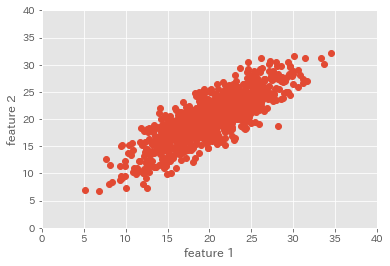

In [4]:
plt.plot(x,y,'o',zorder=1)
plt.axis([0,40,0,40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [24]:
X = np.vstack((x,y)).T

In [6]:
import cv2
mu, eig = cv2.PCACompute(X, np.array([]))
eig

array([[ 0.72568189,  0.68803038],
       [-0.68803038,  0.72568189]])

Text(0,0.5,'feature 2')

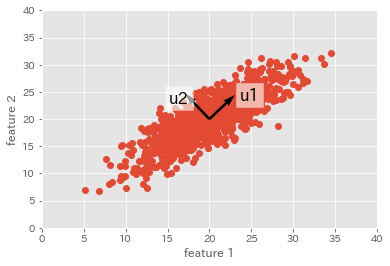

In [8]:
plt.plot(x,y,'o',zorder=1)
plt.quiver(mean[0],mean[1],eig[:,0],eig[:,1],zorder=3,
           scale=0.2,units='xy')
plt.text(mean[0] + 5 * eig[0,0],mean[1] + 5 * eig[0,1],
         'u1',zorder=5,fontsize=16,
         bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean[0] + 7 * eig[1,0],mean[1] + 4 * eig[1,1],
         'u2',zorder=5,fontsize=16,
         bbox=dict(facecolor='white', alpha=0.6))
plt.axis([0,40,0,40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [9]:
X2 = cv2.PCAProject(X,mu,eig)

[-20, 20, -10, 10]

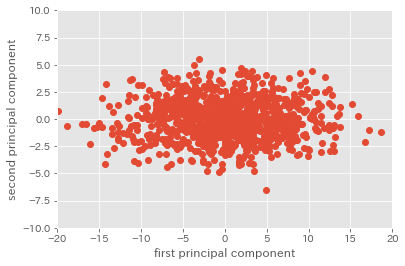

In [10]:
plt.plot(X2[:,0],X2[:,1],'o')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.axis([-20,20,-10,10])

In [11]:
from sklearn import decomposition

In [12]:
ica = decomposition.FastICA()

In [14]:
X2 = ica.fit_transform(X)

[-0.2, 0.2, -0.2, 0.2]

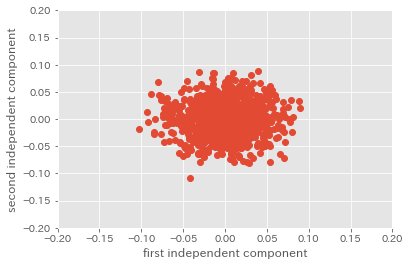

In [16]:
plt.plot(X2[:,0],X2[:,1],'o')
plt.xlabel('first independent component')
plt.ylabel('second independent component')
plt.axis([-0.2,0.2,-0.2,0.2])

In [25]:
nmf = decomposition.NMF()

In [26]:
X2 = nmf.fit_transform(X)

[0, 7, 0, 15]

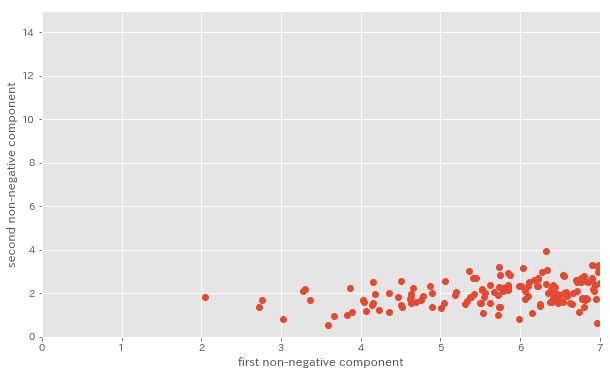

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first non-negative component')
plt.ylabel('second non-negative component')
plt.axis([0, 7, -0, 15])

In [28]:
data = [
    { 'name':'Alan Turing','born':1912,'died':1954 },
    { 'name':'Herbert A Simon', 'born' : 1916, 'died' : 2001},
    { 'name':'Jacek Karpinsk', 'born':1927, 'died' : 2010},
    {'name':'J.C.R Licklider', 'born':1915, 'died': 1990},
    {'name':'Marvin Minsky', 'born':1927,'died':2016}
]

In [29]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[1912, 1954,    1,    0,    0,    0,    0],
       [1916, 2001,    0,    1,    0,    0,    0],
       [1927, 2010,    0,    0,    0,    1,    0],
       [1915, 1990,    0,    0,    1,    0,    0],
       [1927, 2016,    0,    0,    0,    0,    1]], dtype=int64)

In [30]:
vec.get_feature_names()

['born',
 'died',
 'name=Alan Turing',
 'name=Herbert A Simon',
 'name=J.C.R Licklider',
 'name=Jacek Karpinsk',
 'name=Marvin Minsky']

In [31]:
vec = DictVectorizer(sparse=True,dtype=int)
vec.fit_transform(data)

<5x7 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>